<a href="https://colab.research.google.com/github/serenazly/ECON441B/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [14]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [15]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [16]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/CLV.csv")


In [17]:
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [18]:
from sklearn.preprocessing import LabelEncoder

for i in df:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [19]:
X = df.drop('Customer Lifetime Value',axis=1)
y = df[['Customer Lifetime Value']]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor())
])

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [24]:
# Define the hyperparameter space to search over
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (5,20,), (10,50,10,)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPRegressor())]),
             param_grid={'mlp__activation': ['relu', 'tanh'],
                         'mlp__alpha': [0.0001, 0.001],
                         'mlp__hidden_layer_sizes': [(10,), (5, 20),
                                                     (10, 50, 10)]})

In [25]:
# Print the best combination of hyperparameters
print("Parameters: ", grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Parameters:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (10, 50, 10)}
Best Score: 0.16058975859096503


# 3.) Train a model with the optimal solution from GridSearch

In [26]:
# Create MLPClassifier instance with optimal parameters
mlp = MLPRegressor(activation='relu', alpha=0.001, hidden_layer_sizes=(10, 50, 10))

In [27]:
# Train the model on the training set
mlp.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 50, 10))

In [28]:
# Make predictions on the testing set
y_pred_test = mlp.predict(X_test)

In [29]:
# Make predictions on the training set
y_pred_train = mlp.predict(X_train)

# 4.) What are the in-sample and out of sample MSEs

In [30]:
from sklearn.metrics import mean_squared_error

# Compute the mean squared error between y_train and y_pred_train
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the in-sample MSE
print(f"In-sample MSE: {mse_train:.4f}")


In-sample MSE: 4797272.4013


In [31]:

# Compute the mean squared error between y_test and y_pred_test
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the out-of-sample MSE
print(f"Out-of-sample MSE: {mse_test:.4f}")


Out-of-sample MSE: 4887613.8834


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [32]:
import keras.models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [33]:
import tensorflow as tf
hidden_layer_sizes = [10, 50, 10]
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
activation = 'relu'
output = 'softmax'

In [34]:
# Build FNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_sizes[0], activation=activation, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(hidden_layer_sizes[1], activation=activation),
    tf.keras.layers.Dense(hidden_layer_sizes[2], activation=activation),
    tf.keras.layers.Dense(1, activation=output)
])

# Compile model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train model
model.fit(X_train, y_train,epochs=50, batch_size=32)

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 21433748.0000 - mae: 4001.7512
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 21433748.0000 - mae: 4001.7507
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 21433756.0000 - mae: 4001.7517
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 21433756.0000 - mae: 4001.7495
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 21433758.0000 - mae: 4001.7502
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 21433748.0000 - mae: 4001.7512
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 21433754.0000 - mae: 4001.7495
Epoch 8/50
200/200 [==============================] - 0s 1ms/step - loss: 21433750.0000 - mae: 4001.7507
Epoch 9/50
200/200 [==============================] - 0s 1ms/step - loss: 21433750.0000 - mae: 4001.7507
Epoch 10/50
200/200 [==============================] - 

In [35]:
from keras.models import load_model

model.save('model.h5')

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [36]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=bc27af34a9bade5faa9c2230e3f0f9183af64409b8c29715e595e260d028cc99
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer


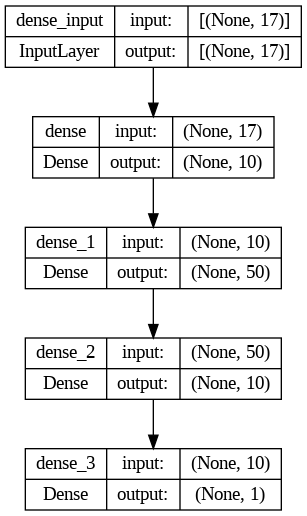

In [37]:
from keras.utils.vis_utils import plot_model


# Visualize the Keras model using plot_model()
plot_model(model, show_shapes=True, show_layer_names=True)

In [39]:
pip install pillow

In [40]:
import matplotlib.pyplot as plt
from PIL import Image

# Visualize the Keras model using ann_viz()
from ann_visualizer.visualize import ann_viz
ann_viz(model, title="Keras Visualization", filename='model.png')

# Load the image file
img = Image.open('model.png')

# Show the image
plt.imshow(img)
plt.savefig('model_plot.png')


In [40]:
from PIL import Image

# Load the image file
img = Image.open('model_plot.png')

# Show the image
img.show()
